### Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes

In [1]:
#Importing libraries to be used later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the dataset and print first 5 rows
df=pd.read_csv('ola.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.shape

(19104, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.describe(include='all')

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,NaN,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,9551.500000,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


### Handling Null values

In [6]:
from sklearn.impute import KNNImputer
imp=KNNImputer( n_neighbors=3)
vals=df['Age'].values
df['Age']=imp.fit_transform(vals.reshape(-1,1))

In [7]:
from sklearn.impute import SimpleImputer
simp=SimpleImputer(strategy='most_frequent')
vals=df['Gender'].values
df['Gender']=simp.fit_transform(vals.reshape(-1,1))

In [8]:
#Creating the target variable from the Lastworkingdate column
df['target']=np.where(df['LastWorkingDate'].isnull() ,0,1)

## Non Graphical Analysis

In [9]:
df.groupby('target')['City'].agg(pd.Series.mode)

target
0    C20
1    C20
Name: City, dtype: object

In [10]:
df.groupby('target')['MMM-YY'].agg(pd.Series.mode)

target
0    01/01/19
1    05/01/19
Name: MMM-YY, dtype: object

In [11]:
df.groupby('target')['Education_Level'].agg(pd.Series.mode)

target
0    1
1    2
Name: Education_Level, dtype: int64

In [12]:
df.groupby('target')['Dateofjoining'].agg(pd.Series.mode)

target
0    23/07/15
1    31/10/19
Name: Dateofjoining, dtype: object

In [13]:
df.groupby('target')['Gender'].agg(pd.Series.mode)

target
0    0.0
1    0.0
Name: Gender, dtype: float64

In [14]:
df.groupby('target')['LastWorkingDate'].agg(pd.Series.mode)

target
0          []
1    29/07/20
Name: LastWorkingDate, dtype: object

In [15]:
df.groupby('target')['Joining Designation'].agg(pd.Series.mode)

target
0    1
1    1
Name: Joining Designation, dtype: int64

In [16]:
df.groupby('target')['Grade'].agg(pd.Series.mode)

target
0    2
1    2
Name: Grade, dtype: int64

In [17]:
df.groupby('target')['Age'].median()

target
0    34.0
1    33.0
Name: Age, dtype: float64

In [18]:
df.groupby('target')['Income'].median()

target
0    61291.0
1    51630.0
Name: Income, dtype: float64

In [19]:
df.groupby('target')['Total Business Value'].median()

target
0    300520.0
1         0.0
Name: Total Business Value, dtype: float64

## Graphical Analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

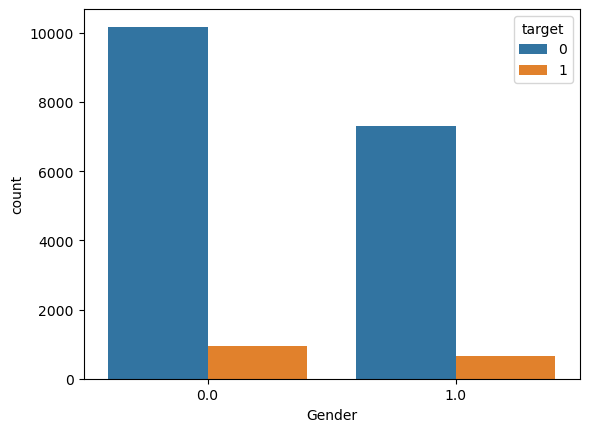

In [20]:
sns.countplot(df['Gender'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

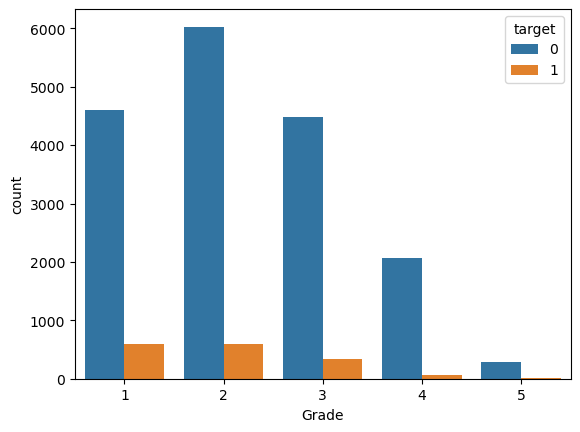

In [21]:
sns.countplot(df['Grade'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

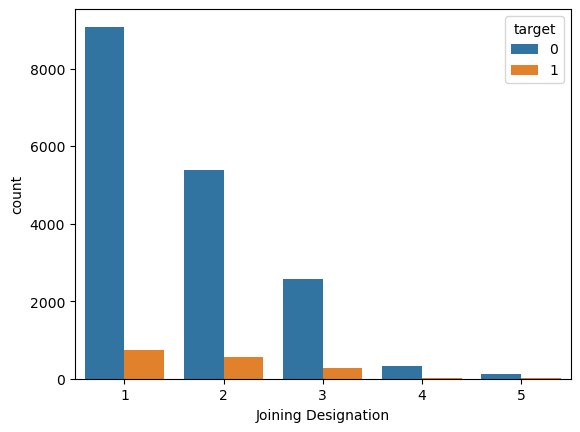

In [22]:
sns.countplot(df['Joining Designation'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

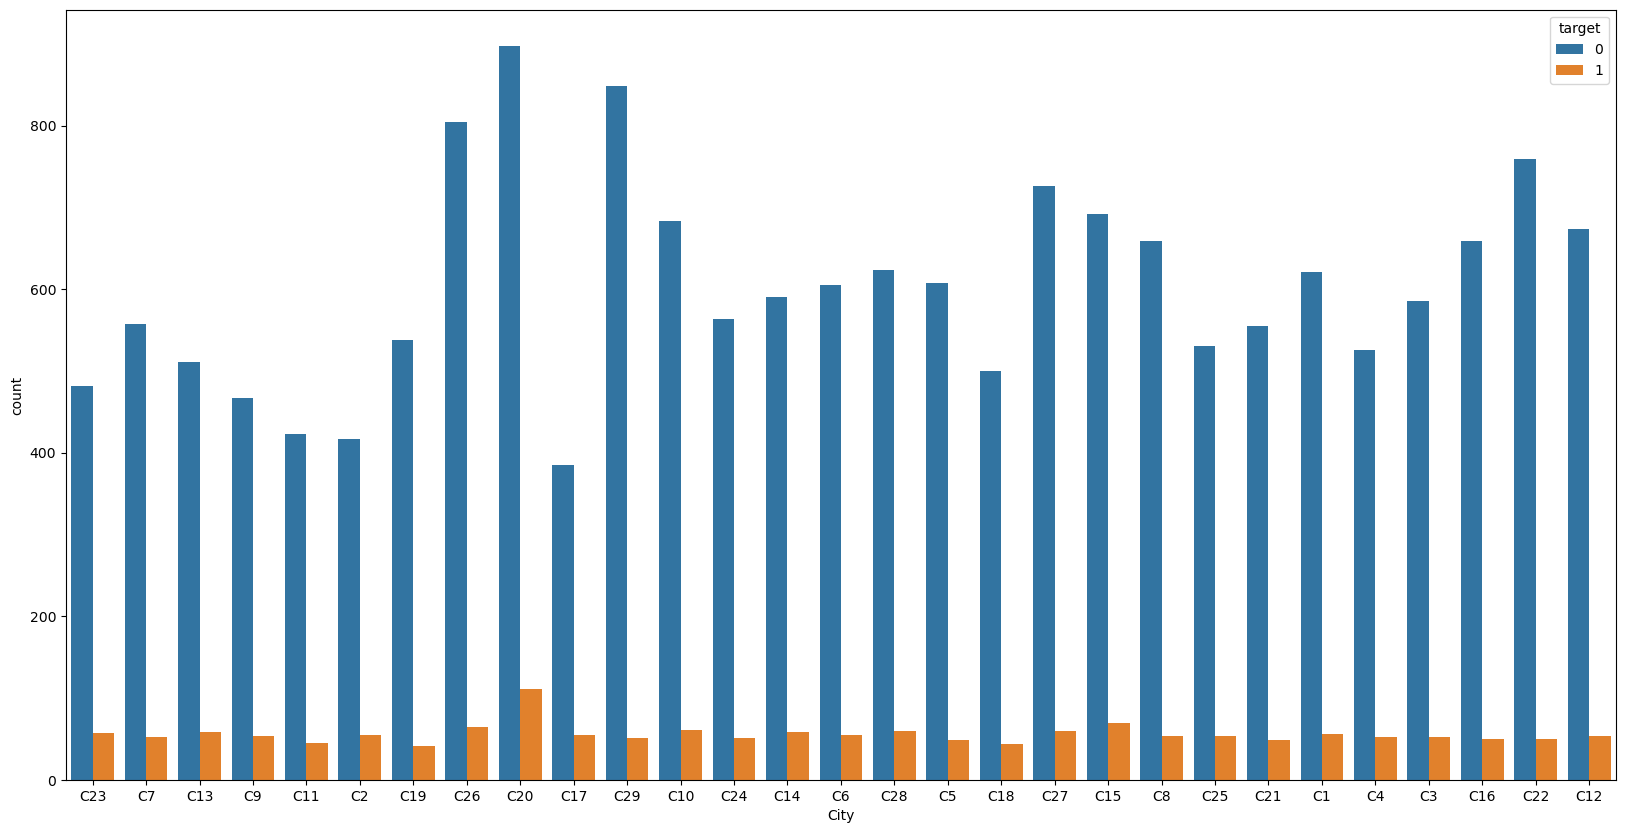

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df['City'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

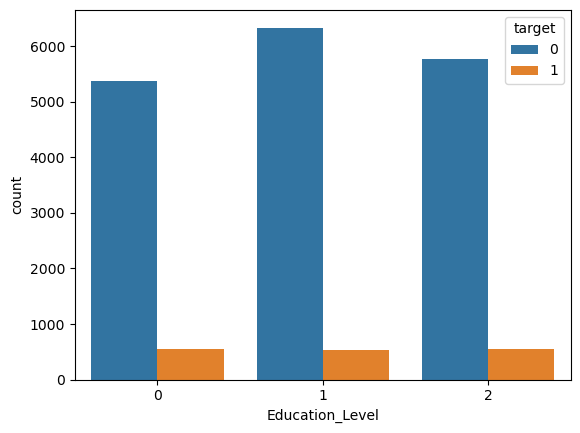

In [24]:
sns.countplot(df['Education_Level'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quarterly Rating', ylabel='count'>

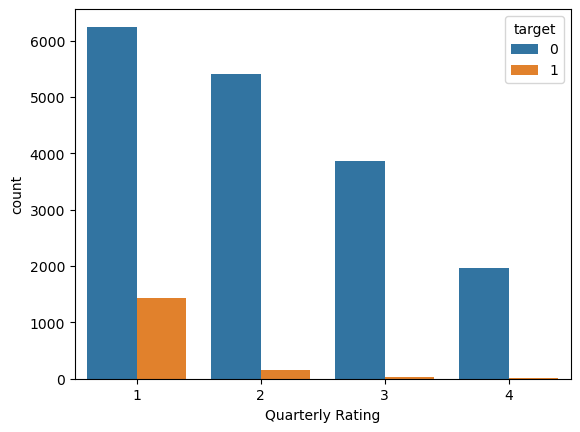

In [25]:
sns.countplot(df['Quarterly Rating'],hue=df['target'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Business Value', ylabel='Density'>

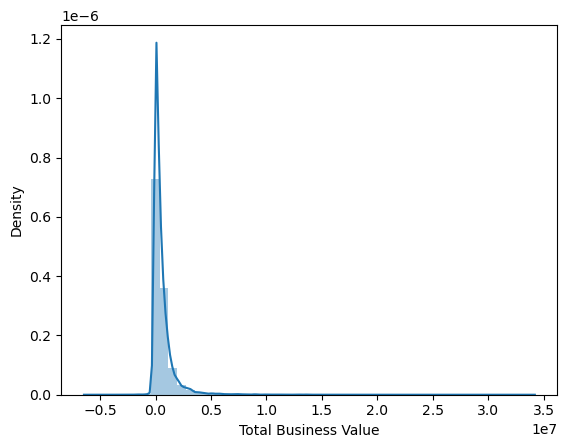

In [26]:
sns.distplot(df['Total Business Value'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

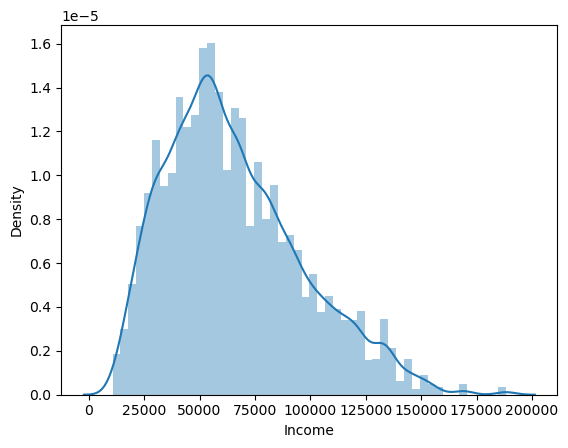

In [27]:
sns.distplot(df['Income'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

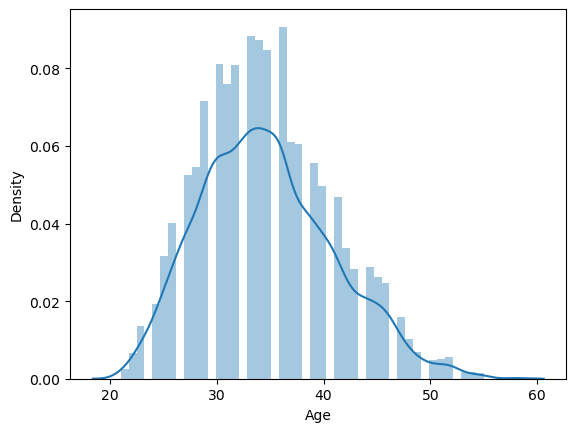

In [28]:
sns.distplot(df['Age'])

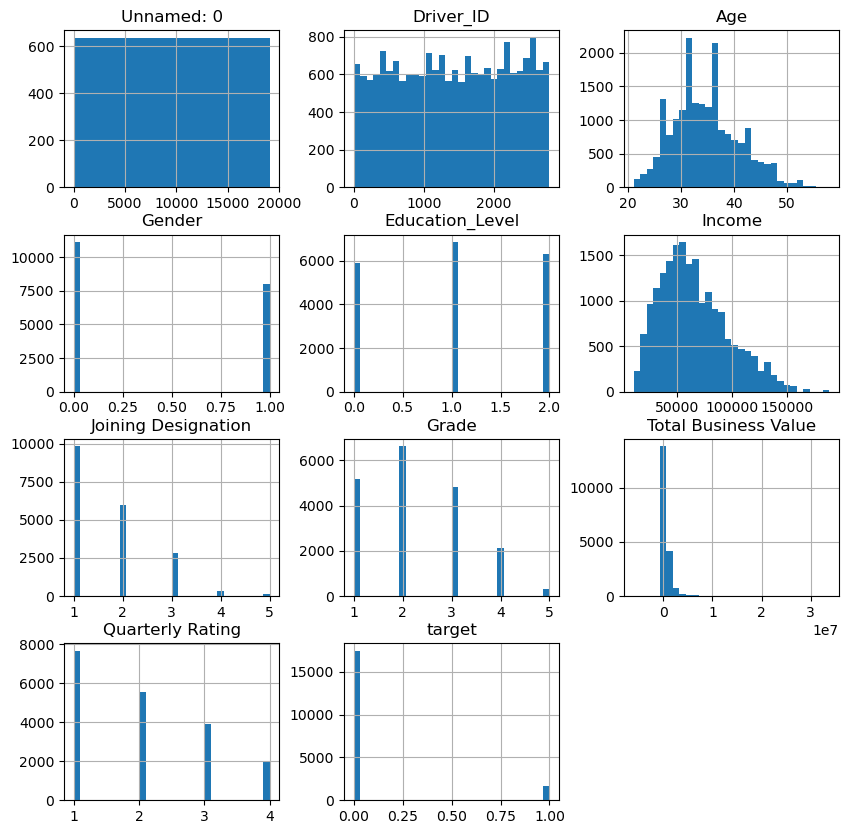

In [29]:
df.hist(figsize=(10,10),bins=30);

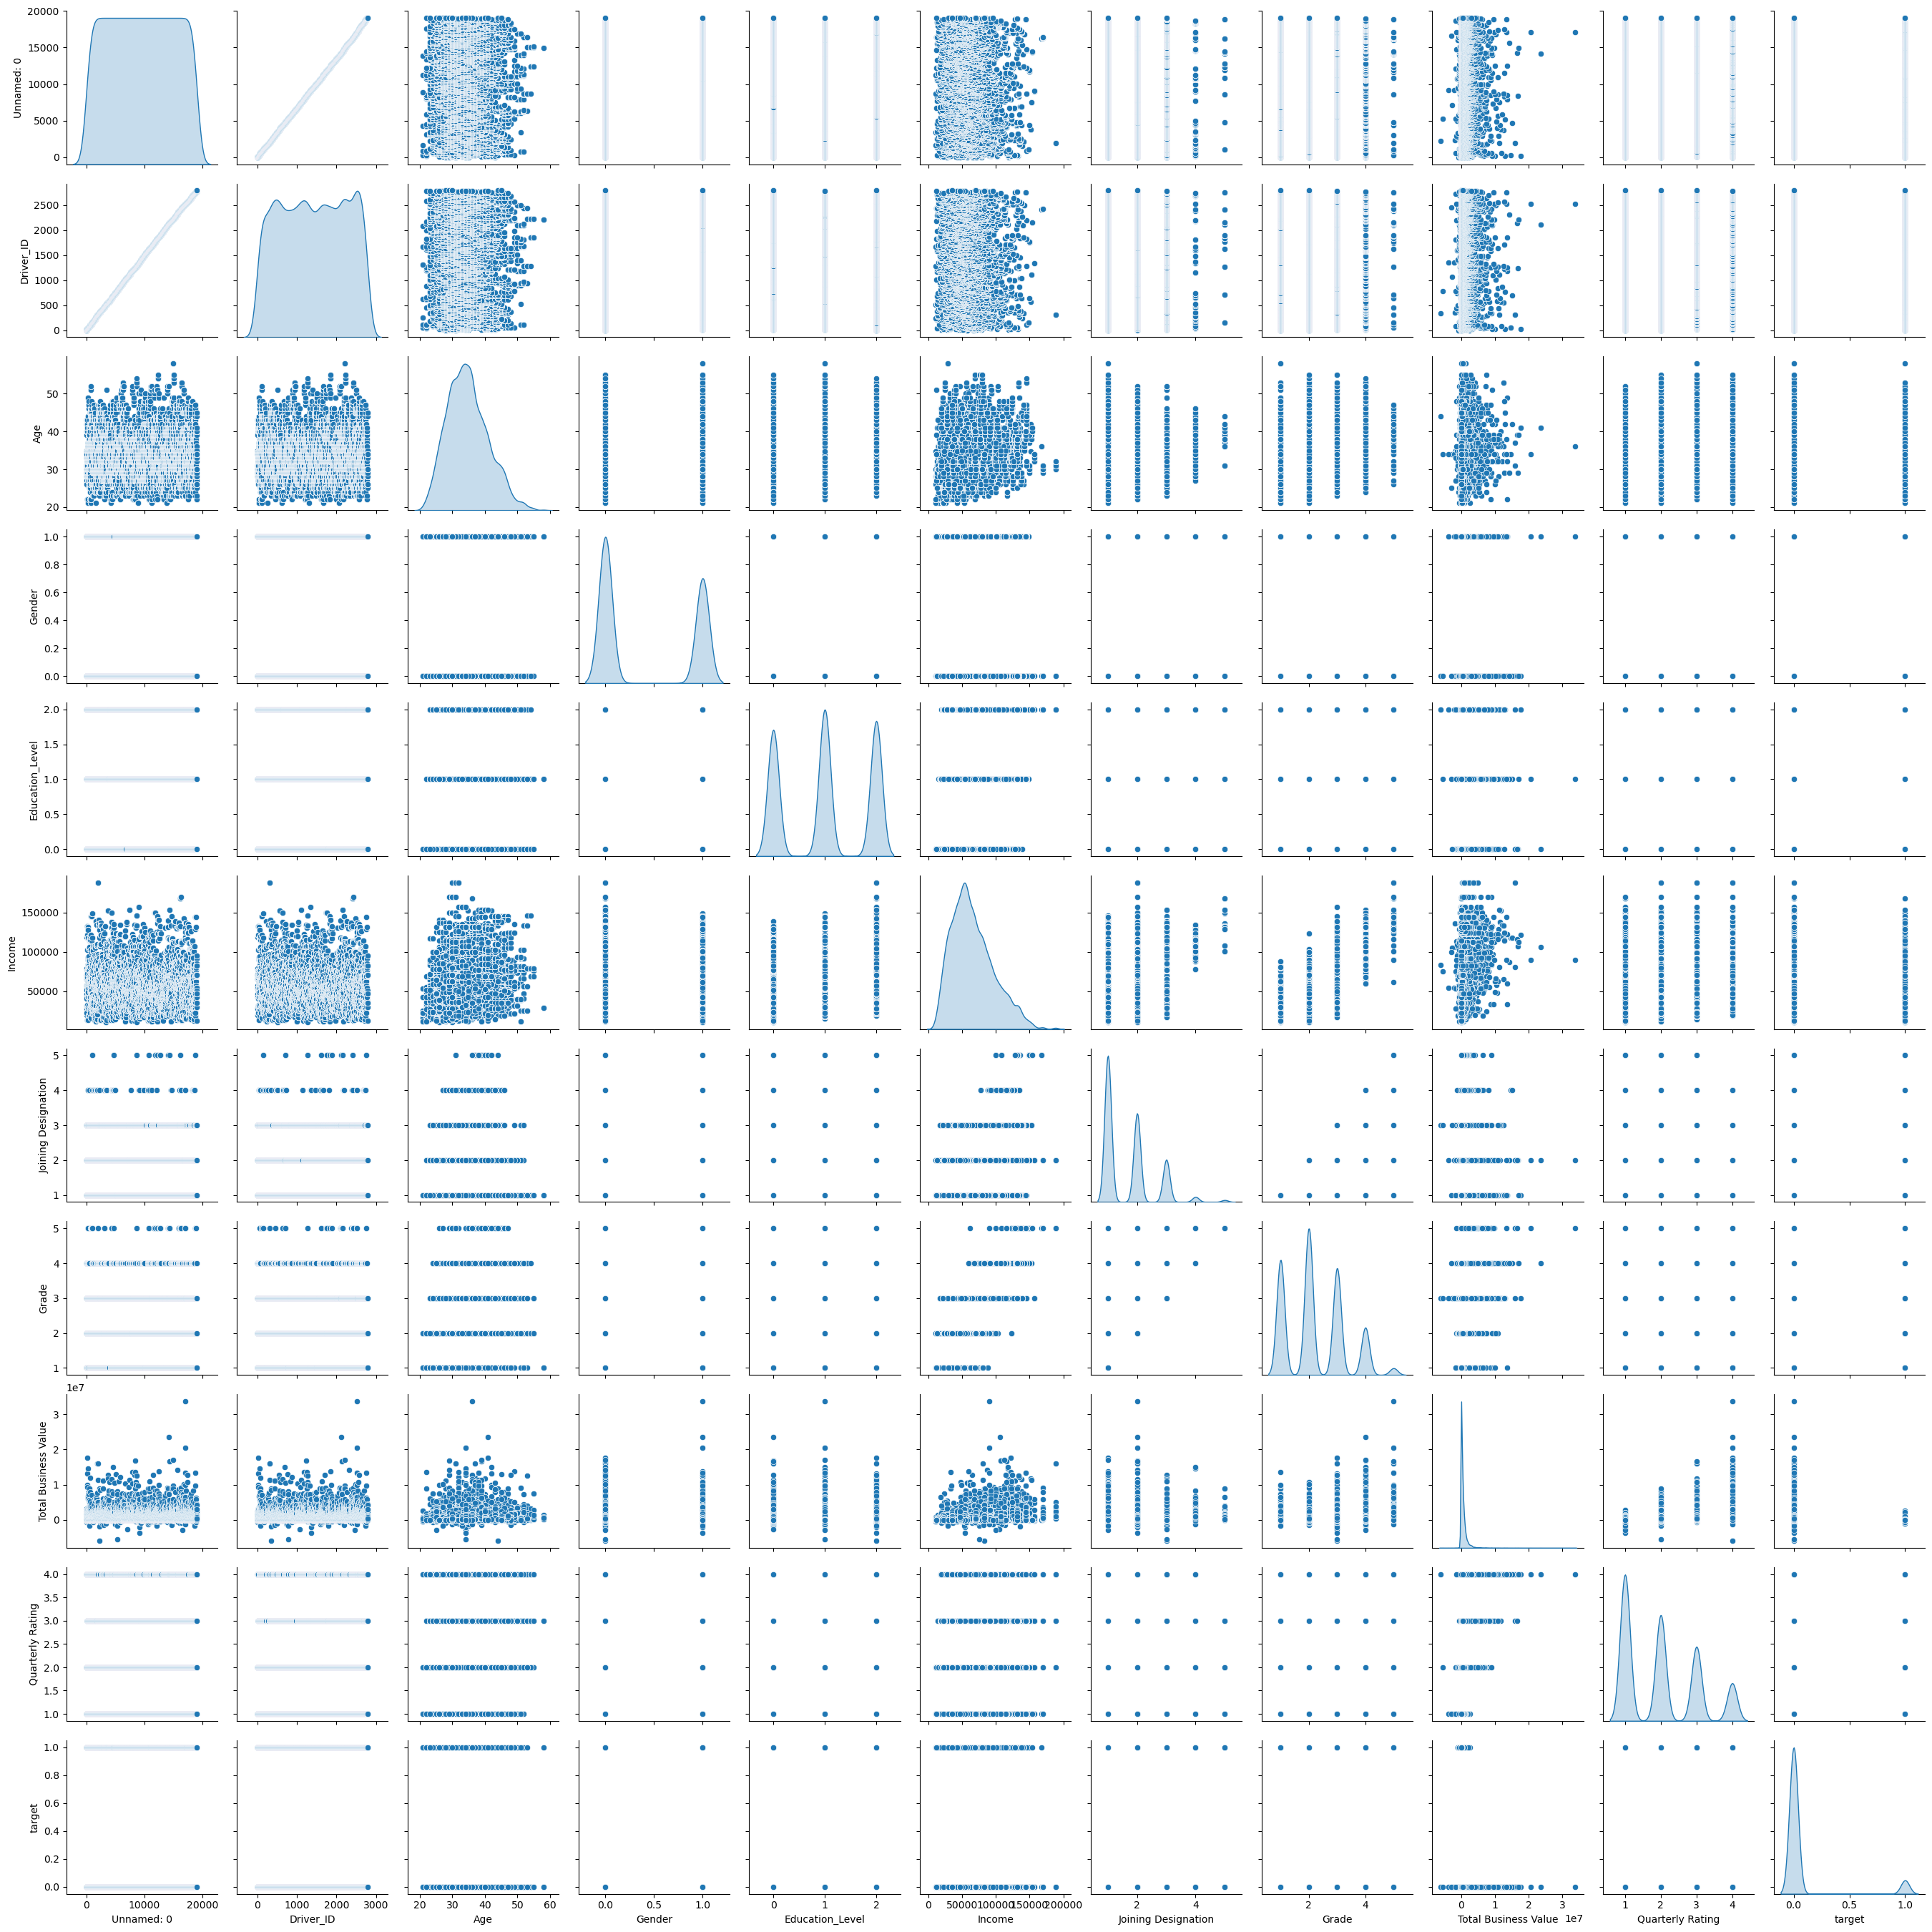

In [30]:
sns.pairplot(df, diag_kind='kde')

## Feature Engineering

In [31]:
#Dropping the unnamed feature 
df.drop('Unnamed: 0',axis=1, inplace=True)

In [32]:
#Converting the reporting date to datetime format
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])

In [33]:
#Converting the Dateofjoining to datetime format
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])

In [34]:
#Converting the LastWorkingDate feature to datetime format
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [35]:
n=df['LastWorkingDate'].max()

In [36]:
#Filling the null values of Lastworkingdate with today
df['LastWorkingDate'].fillna(n, inplace=True)

In [37]:
#Derived a feature called tenure which depicts the number of day the driver has worked with the comapny
temp=df['LastWorkingDate']-df['Dateofjoining']
df['tenure']=temp.dt.days

In [38]:
#Derived a feature called tenure_y which contains the number of year(s)the driver has worked with the company
#temp1=df['LastWorkingDate'].dt.year-df['Dateofjoining'].dt.year
#df['tenure_y']=temp1

In [39]:
#Derving the year, month and date of joining from the dateofjoining feature
df['yoj']=df['Dateofjoining'].dt.year
df['moj']=df['Dateofjoining'].dt.month
df['doj']=df['Dateofjoining'].dt.day

In [40]:
df['yoj']=df['yoj'].map(str)
df['moj']=df['moj'].map(str)
df['doj']=df['doj'].map(str)

In [41]:
#Derving the year, month and date of leaving from the LastWorkingDate feature
#df['ly']=df['LastWorkingDate'].dt.year
#df['lm']=df['LastWorkingDate'].dt.month
#df['ld']=df['LastWorkingDate'].dt.day

In [42]:
#df['ly']=df['ly'].map(str)
#df['lm']=df['lm'].map(str)
#df['ld']=df['ld'].map(str)

In [43]:
#Derving the year, month and date of leaving from the LastWorkingDate feature
df['ry']=df['MMM-YY'].dt.year
df['rm']=df['MMM-YY'].dt.month
df['rd']=df['MMM-YY'].dt.day

In [44]:
df['ry']=df['ry'].map(str)
df['rm']=df['rm'].map(str)
df['rd']=df['rd'].map(str)

In [45]:
df['MMM-YY']=df['MMM-YY'].map(str)
df['Dateofjoining']=df['Dateofjoining'].map(str)
df['LastWorkingDate']=df['LastWorkingDate'].map(str)
df.drop(['MMM-YY','Dateofjoining','LastWorkingDate'],axis=1,inplace=True)

### Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [46]:
qr=df.groupby(['Driver_ID'])['Quarterly Rating'].agg(list)

In [47]:
df[df['Driver_ID']==2784]

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,tenure,yoj,moj,doj,ry,rm,rd
19055,2784,33.0,0.0,C24,0,82815,2,3,1226590,3,0,1901,2015,10,15,2019,1,1
19056,2784,33.0,0.0,C24,0,82815,2,3,203290,3,0,1901,2015,10,15,2019,2,1
19057,2784,33.0,0.0,C24,0,82815,2,3,4495040,3,0,1901,2015,10,15,2019,3,1
19058,2784,33.0,0.0,C24,0,82815,2,3,100450,1,0,1901,2015,10,15,2019,4,1
19059,2784,33.0,0.0,C24,0,82815,2,3,226010,1,0,1901,2015,10,15,2019,5,1
19060,2784,33.0,0.0,C24,0,82815,2,3,0,1,0,1901,2015,10,15,2019,6,1
19061,2784,33.0,0.0,C24,0,82815,2,3,102770,1,0,1901,2015,10,15,2019,7,1
19062,2784,33.0,0.0,C24,0,82815,2,3,270710,1,0,1901,2015,10,15,2019,8,1
19063,2784,33.0,0.0,C24,0,82815,2,3,271380,1,0,1901,2015,10,15,2019,9,1
19064,2784,33.0,0.0,C24,0,82815,2,3,990000,3,0,1901,2015,10,15,2019,10,1


In [48]:
inc_qr=[]
for x in qr:
    if x[0]>=x[-1]:
        inc_qr.append(0)
    else:
        inc_qr.append(1)
        

### Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [49]:
income=df.groupby(['Driver_ID'])['Income'].agg(list)

In [50]:
inc_inc=[]
for y in income:
    if y[0]>=y[-1]:
        inc_inc.append(0)
    else:
        inc_inc.append(1)

### Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

In [51]:
sel={
    'Age':'max',
    'Gender':'first', 
    'City':'first', 
    'Education_Level':'last',
    'Income':'last',
    'Joining Designation':'last',
    'tenure':'last',
    #'tenure_y':'last',
    'Grade':'last',
    'target':'last',
    #'MMM-YY':'last',
    #'Dateofjoining':'first',
    #'LastWorkingDate':'last',
    'Total Business Value':'sum', 
    'Quarterly Rating':'last',
     'doj':'first',
     'moj':'first',
     'yoj': 'first',
     'ry':'first',
     'rm':'first',
     'rd': 'first'
    #'ly':'last',
     #'lm':'last',
     #'ld': 'last'
}

In [52]:
df=pd.DataFrame(df.groupby(['Driver_ID']).agg(sel))


In [53]:
df['Increased_income']=inc_inc

In [54]:
df['Increased_qr']=inc_qr

In [55]:
#Applying target encoding on the categorical feature 'City'
import category_encoders as ce
tenc=ce.TargetEncoder()
df['City']=tenc.fit_transform(df['City'],df['target'])

/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [56]:
l=['doj', 'moj', 'yoj', 'ry','rm', 'rd'] #'ly', 'lm', 'ld']#'MMM-YY','Dateofjoining','LastWorkingDate']

In [57]:
for i in l:
    df[i]=tenc.fit_transform(df[i],df['target'])

In [58]:
pd.options.display.max_columns = None
df.head()

,Age,Gender,City,Education_Level,Income,Joining Designation,tenure,Grade,target,Total Business Value,Quarterly Rating,doj,moj,yoj,ry,rm,rd,Increased_income,Increased_qr
Driver_ID,,,,,,,,,,,,,,,,,,,
1,28.0,0.0,0.770270,2,57387,1,77,1,1,1715580,2,0.714286,0.580952,0.883139,0.793059,0.777365,0.678706,0,0
2,31.0,0.0,0.684211,2,67016,2,52,2,0,0,1,0.647727,0.604743,0.462103,0.463030,0.535948,0.678706,0,0
4,43.0,0.0,0.816901,2,65603,2,142,2,1,350000,1,0.648352,0.580952,0.827411,0.793059,0.398734,0.678706,0,0
5,29.0,0.0,0.706667,0,46368,1,57,1,1,120360,1,0.704225,0.804878,0.827411,0.793059,0.777365,0.678706,0,0
6,31.0,1.0,0.703125,1,78728,3,150,3,0,1265000,2,0.523810,0.648649,0.462103,0.463030,0.503356,0.678706,0,1


### Outlier detection and removal

In [59]:
a=['Age', 'Income',
       'Joining Designation',
       'Total Business Value', 'Quarterly Rating']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


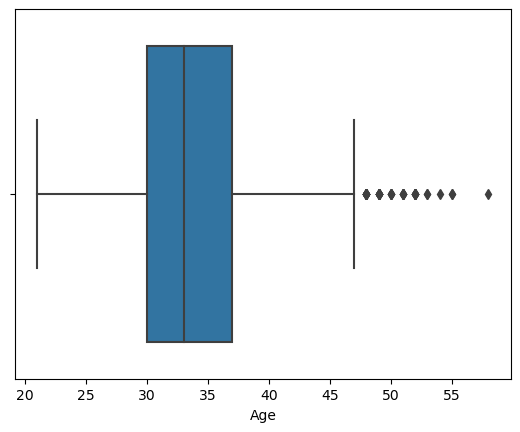

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


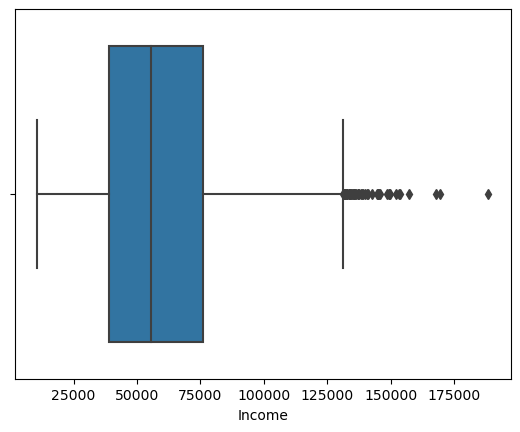

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


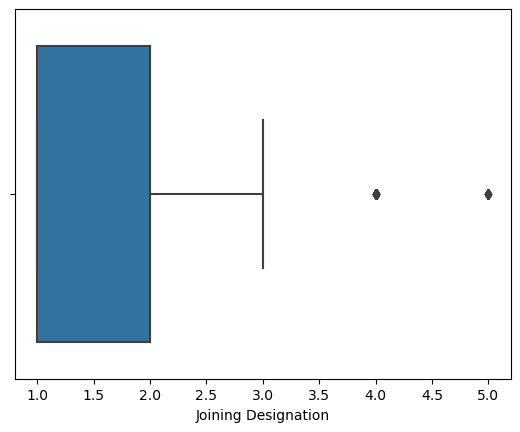

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


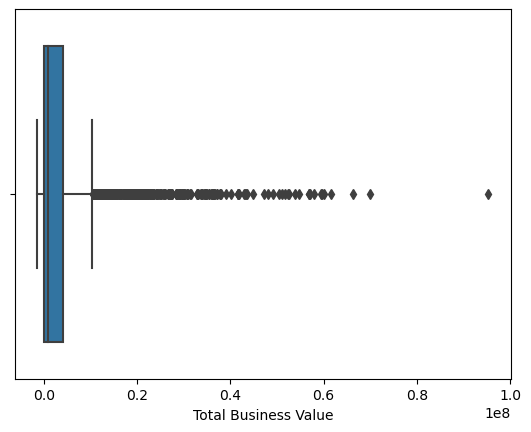

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


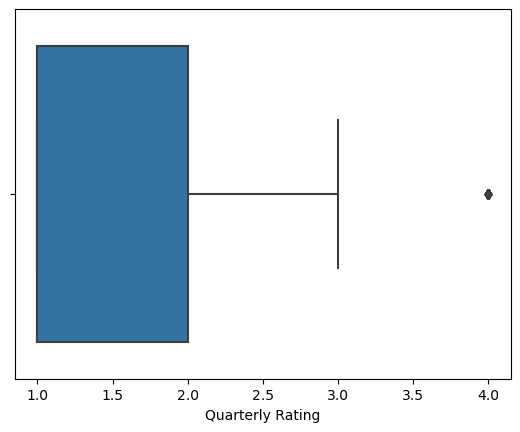

In [60]:
for i in a:
    sns.boxplot(df[i])
    plt.show()

In [61]:
df.shape

(2381, 19)

In [62]:
def outliers(data,feature):
  q1=data[feature].quantile(0.05)
  q3=data[feature].quantile(0.95)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  return ul,ll

In [63]:
for i in a:
  ul,ll=outliers(df,i)
  df=df[(df[i]<ul) & (df[i]>ll)]

In [64]:
df.shape

(2374, 19)

<AxesSubplot:>

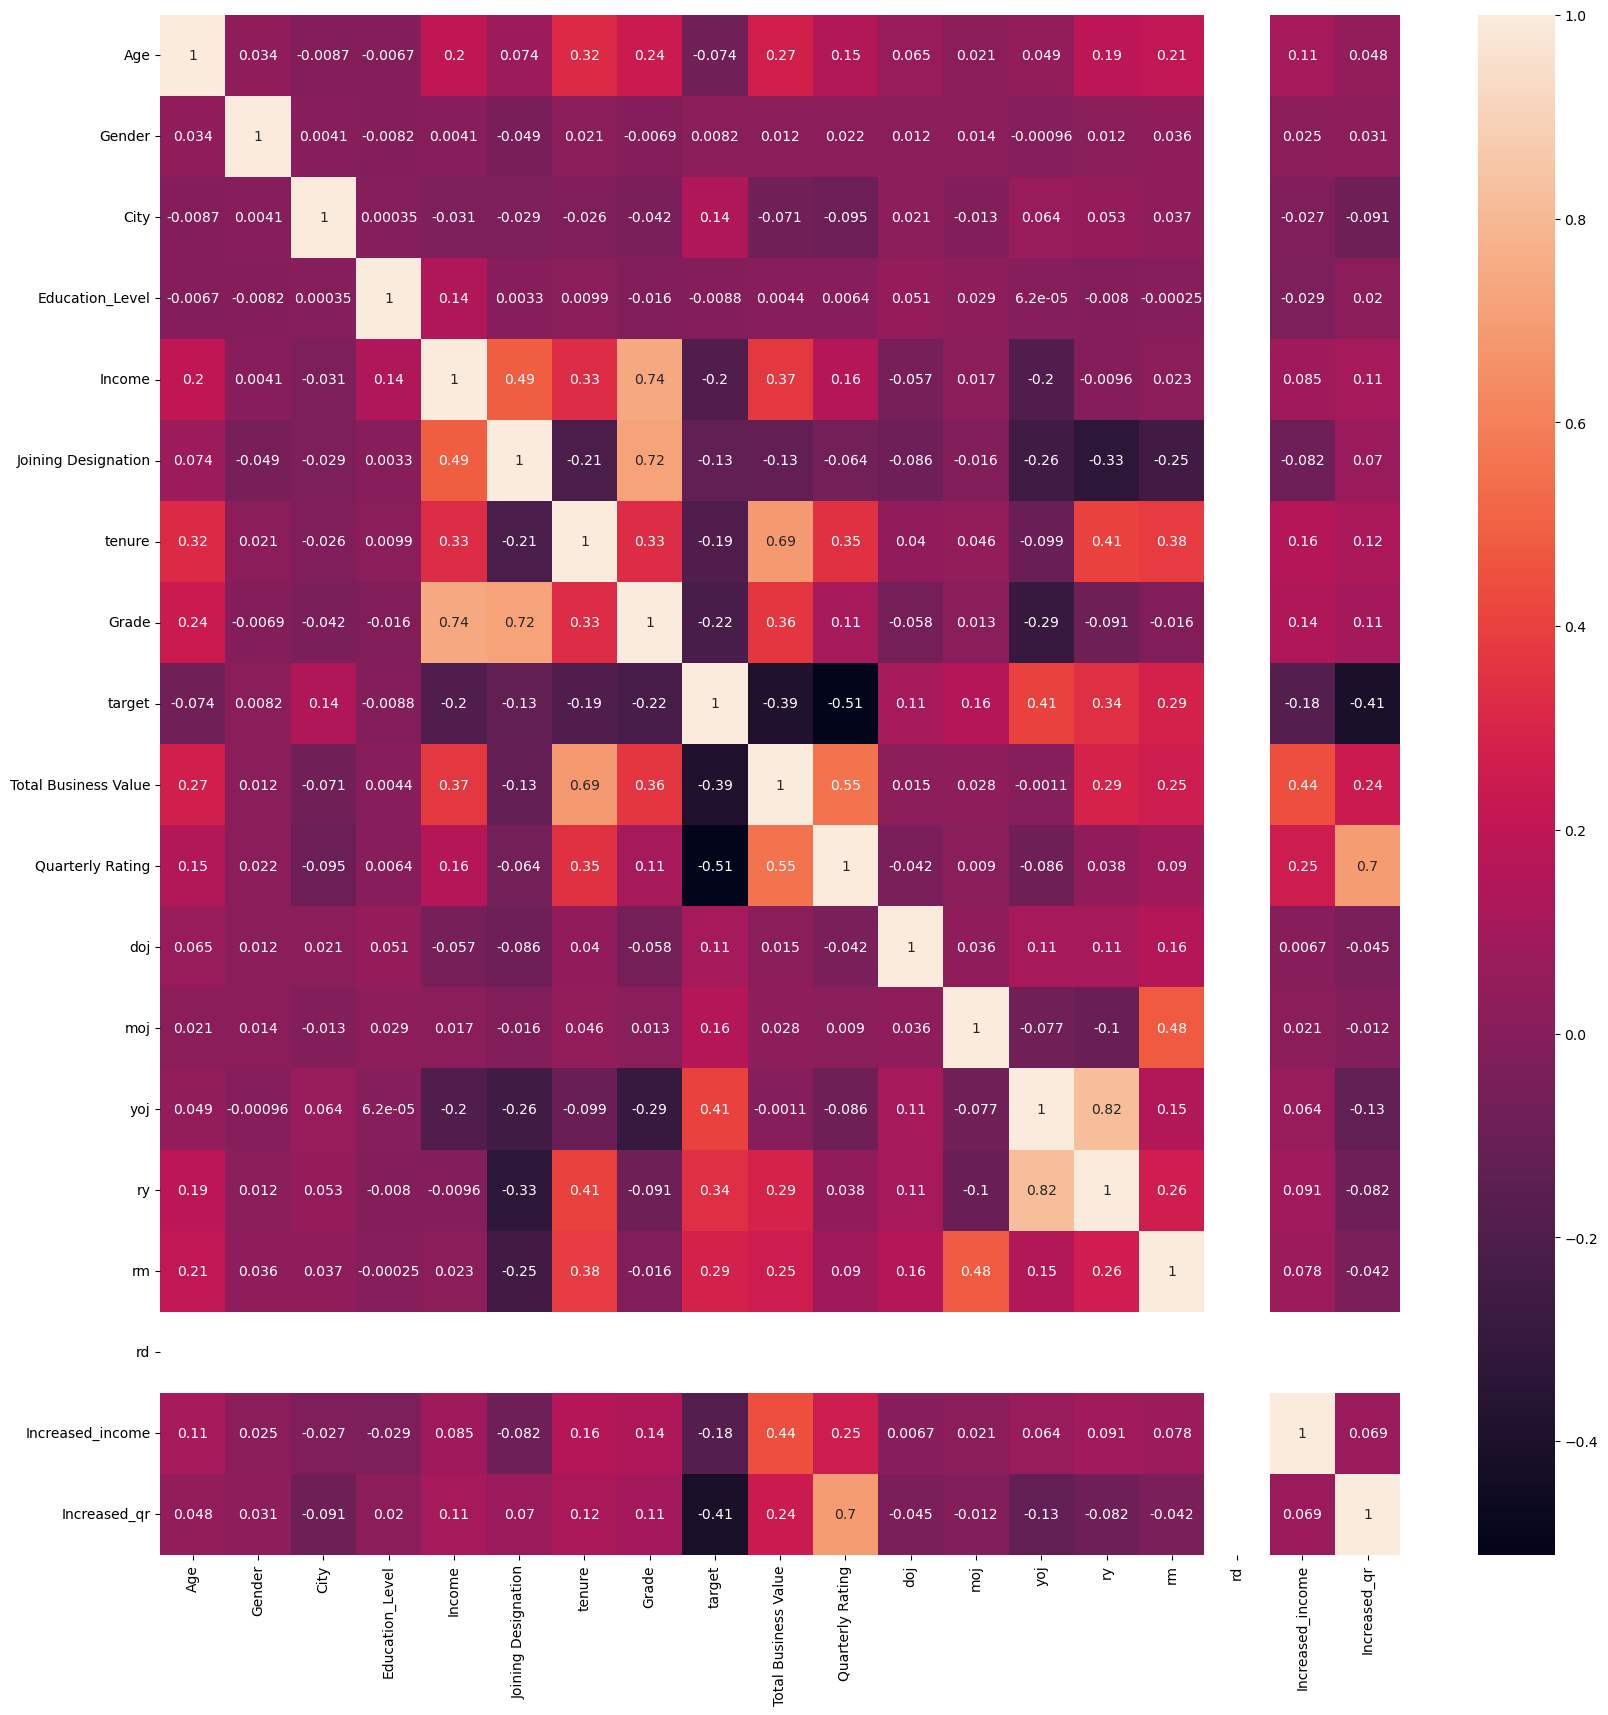

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [66]:
#Dropping the rd feature as aa the values of rd are same
df.drop(['rd'],axis=1,inplace=True)

<AxesSubplot:>

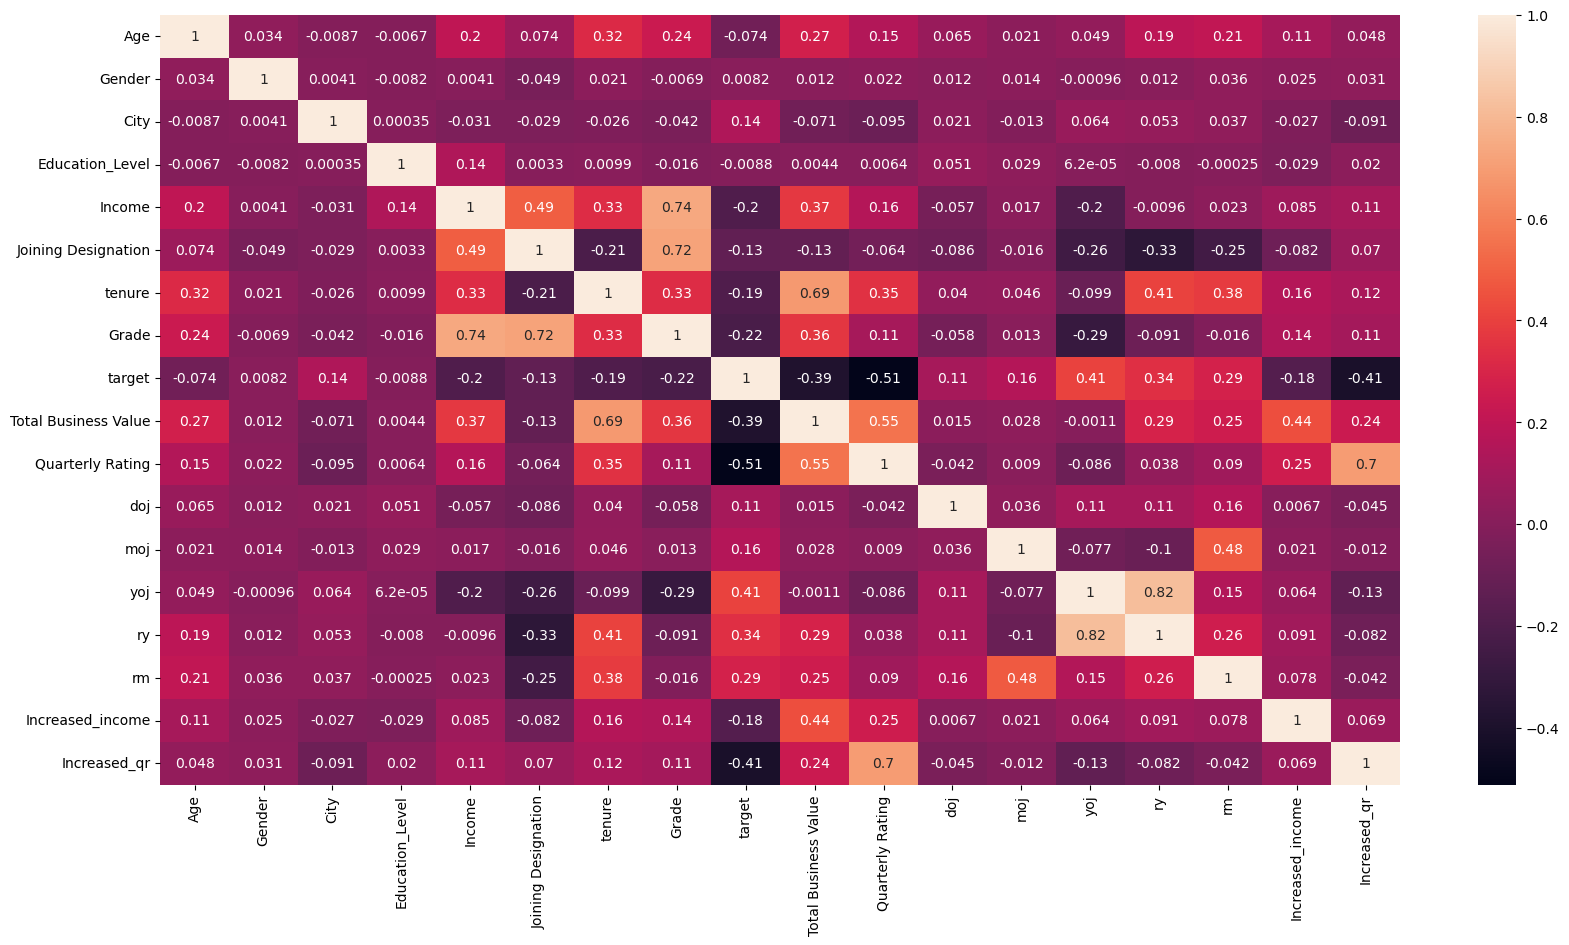

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [68]:
#Splitting features and target
X=df.drop('target',axis=1)
y=df['target']

### Handling imbalanced Data using SMOTE

In [69]:
y.value_counts()

1    1615
0     759
Name: target, dtype: int64

In [70]:

from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)

### Standardizing the data using StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sm=sc.fit_transform(X_sm)

### Splitting the data into training and testing sets

In [72]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X_sm,y_sm,test_size=0.3)

# Model Creation

In [73]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_curve,precision_recall_curve,precision_score,recall_score

## Creating the Bagging Model using Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_hat=rf.predict(X_test)
recall_score(y_test,y_hat)

0.916

As the Random Forest model used above is just a random model with no hyperparameter settings, hyperparameter tuning is done on the Random Forest Model below

### Hyperparameter Tuning of Random Forest

In [75]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [10,15,20],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,13,17]
         }

In [76]:
from sklearn.model_selection import GridSearchCV

tuning_function = GridSearchCV(estimator = RandomForestClassifier(), 
                               param_grid = params,
                               scoring = 'recall',
                               cv = 5,
                               n_jobs=-1
                               )

In [77]:
tuning_function.fit(X_train, y_train)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 8, 'n_estimators': 200}
0.9363228699551568


In [78]:
yh=tuning_function.predict(X_test)
recall_score(y_test,yh)

0.924

### Final Random Forest Model with best hyperparameter settings

In [79]:
rf=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=15,max_features=13,n_estimators=400,random_state=42)

In [80]:
rf.fit(X_train,y_train)
yh=rf.predict(X_test)
recall_score(y_test,yh)

0.922

In [81]:
print(classification_report(y_test,yh))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       469
           1       0.96      0.92      0.94       500

    accuracy                           0.94       969
   macro avg       0.94      0.94      0.94       969
weighted avg       0.94      0.94      0.94       969



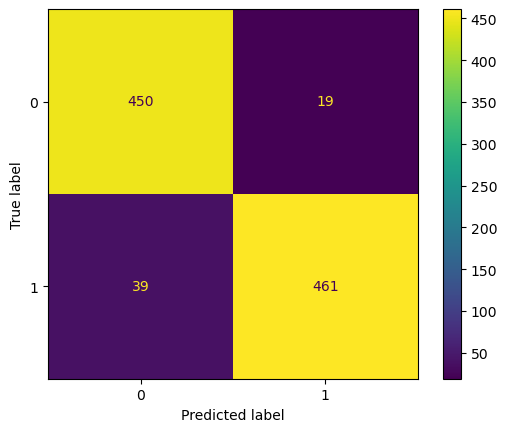

In [82]:
cm=confusion_matrix(y_test,yh)
ConfusionMatrixDisplay(cm).plot()

Text(0.5, 1.0, 'AUC-ROC Curve')

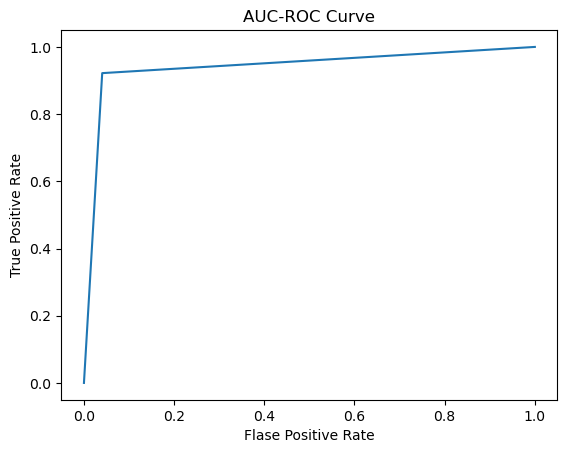

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, yh)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

## Creating the Boosting Model using  LIGHTGBM

In [84]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_hat1=lgbm.predict(X_test)
recall_score(y_test,y_hat)

0.916

### Hyperparameter tuning of the LGBM Classifier

In [85]:
hp={
    'boosting_type':['gbdt','goss'],
    'max_depth':[10,50,100],
    'learning_rate':[0.1,0.5,0.8],
    'n_estimators':[400,500,600],
    'subsample':[0.3,0.5,0.8],
    'colsample_bytree':[0.3,0.5,0.8]
}

In [86]:
tuning_function = GridSearchCV(estimator = LGBMClassifier(), 
                               param_grid = hp,
                               scoring = 'recall',
                               cv = 5,
                               n_jobs=-1
                               )

In [87]:
tuning_function.fit(X_train, y_train)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'boosting_type': 'gbdt', 'colsample_bytree': 0.5, 'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.3}
0.9497757847533632


In [88]:
yh=tuning_function.predict(X_test)
recall_score(y_test,yh)

0.926

### FInal model after hyperparameter tuning

In [89]:
lgbm=LGBMClassifier(boosting_type='gbdt', colsample_bytree=0.3, max_depth=10,
               n_estimators=500, subsample=0.3,learning_rate=0.8)
lgbm.fit(X_train,y_train)
pred=lgbm.predict(X_test)
recall_score(y_test,pred)

0.944

### Classification Report

In [90]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       469
           1       0.97      0.94      0.96       500

    accuracy                           0.95       969
   macro avg       0.95      0.95      0.95       969
weighted avg       0.95      0.95      0.95       969



### Confusion Matrix

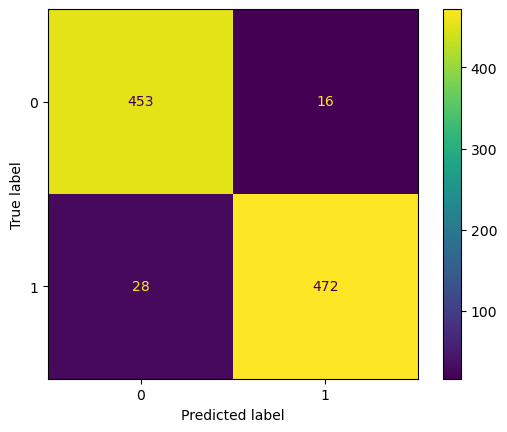

In [91]:
cm=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(cm).plot()

### AUC-ROC Curve

Text(0.5, 1.0, 'AUC-ROC Curve')

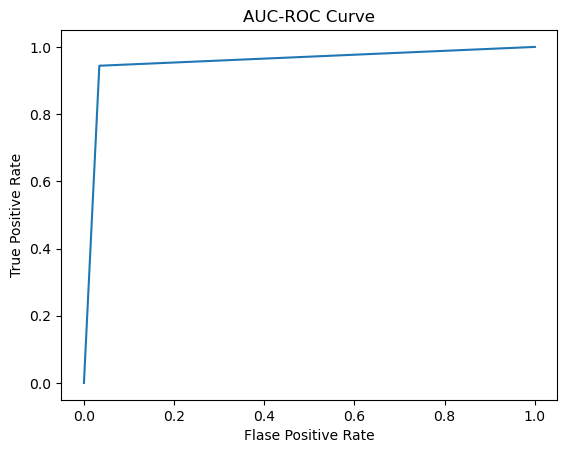

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

In [93]:
!pip install pandoc